In [1]:
from sklearn.datasets import fetch_openml
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

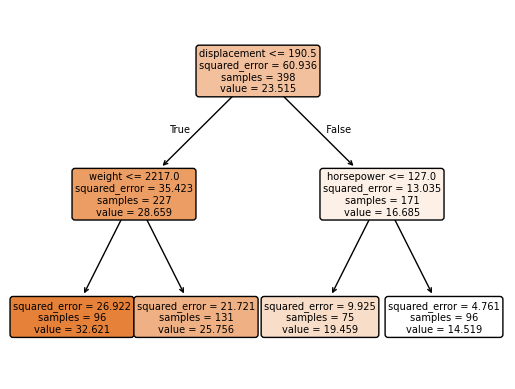

In [2]:
dataset = fetch_openml(data_id=196, as_frame=True)
dt = tree.DecisionTreeRegressor(max_depth=2)
dt.fit(dataset.data, dataset.target)
plot_tree = tree.plot_tree(dt, filled=True, feature_names=dataset.feature_names, rounded=True)


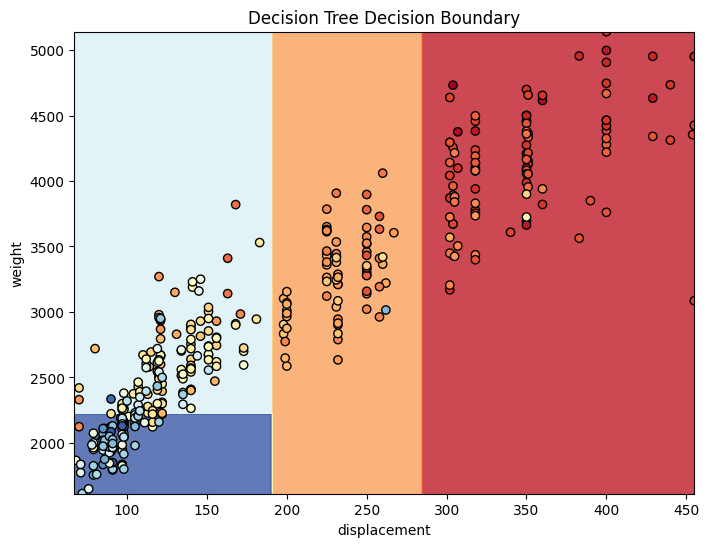

In [3]:
# Define input variables for flexibility
input_vars = [1, 3]  # Indices of the input variables (e.g., 1 for 'displacement', 3 for 'weight')

# Ensure X contains only numeric data for plotting
X = dataset.data.to_numpy()
y = dataset.target.to_numpy()

# Fit the decision tree with the selected input variables
dt.fit(X[:, input_vars], y)

# Define the range for the selected input variables
x_min, x_max = X[:, input_vars[0]].min() - 1, X[:, input_vars[0]].max() + 1
y_min, y_max = X[:, input_vars[1]].min() - 1, X[:, input_vars[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Predict the output for each point in the mesh grid
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, input_vars[0]], X[:, input_vars[1]], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel(dataset.feature_names[input_vars[0]])
plt.ylabel(dataset.feature_names[input_vars[1]])
plt.title('Decision Tree Decision Boundary')
plt.show()


In [4]:
np.random.seed(0)
y = np.random.randint(0, 2, 15)

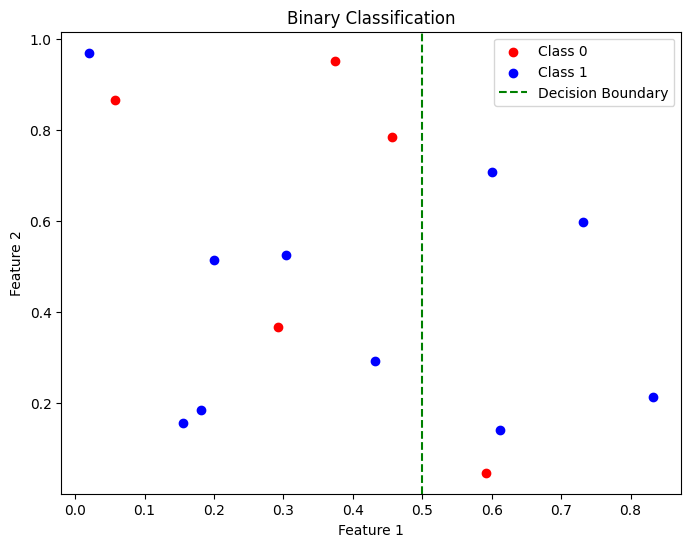

In [5]:
# Define X as a 2D array with random values
np.random.seed(42)  # Set seed for reproducibility
X = np.random.rand(len(y), 2)  # Generate random values for 2 features

# Scatter plot with updated labels
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.axvline(x=0.5, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification')
plt.legend()
plt.show()


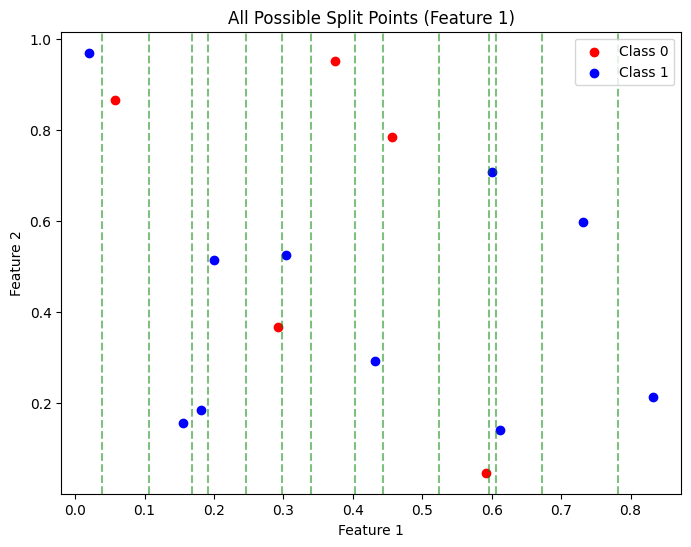

In [6]:
# Sort the values of the first feature
x_sorted = np.sort(X[:, 0])

# Compute all possible split points (midpoints between consecutive unique values)
split_points = (x_sorted[:-1] + x_sorted[1:]) / 2

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

# Plot vertical bars at each split point
for sp in split_points:
    plt.axvline(x=sp, color='green', linestyle='--', alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('All Possible Split Points (Feature 1)')
plt.legend()
plt.show()

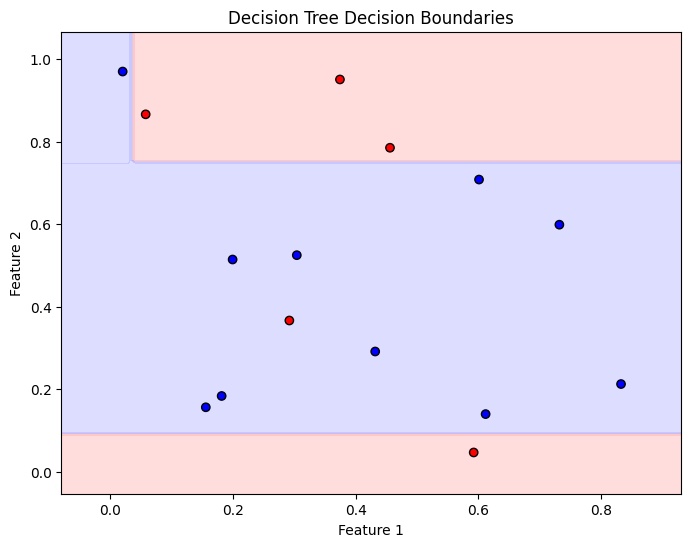

In [7]:
# Plot the decision boundaries of the trained decision tree (dt) using the X and y variables
from matplotlib.colors import ListedColormap

# Create a mesh grid for plotting
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the mesh grid
dt.fit(X, y)
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'blue']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries')
plt.show()